In [35]:
#STUDENT EXAM SCORE PREDICTION 

import pandas as pd #import pandas library 

dataframe = pd.read_csv("/kaggle/input/exam-score-prediction-dataset/Exam_Score_Prediction.csv")
#looking into the dataset
dataframe.head() 
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


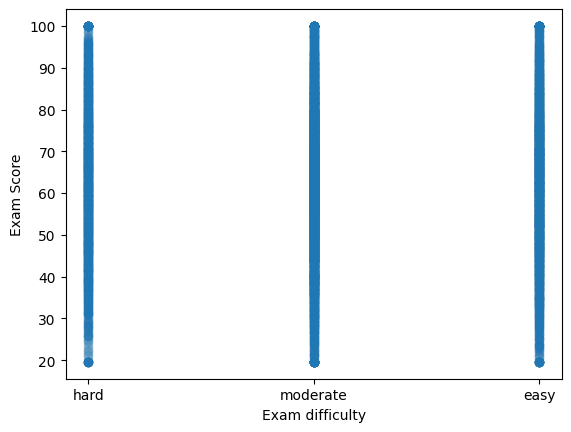

In [36]:
import matplotlib.pyplot as plt
#analyzing each feature with respect to exam score 
plt.scatter(dataframe["exam_difficulty"],dataframe['exam_score'],alpha=0.05)
plt.xlabel("Exam difficulty")
plt.ylabel("Exam Score")
plt.show()

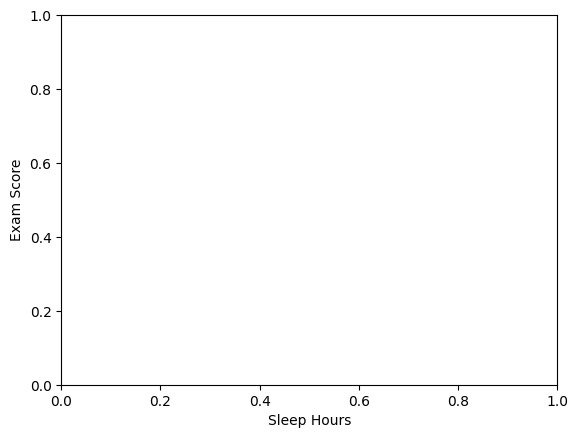

In [37]:
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

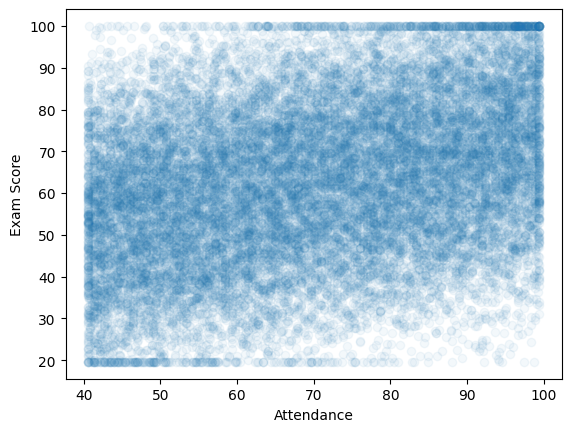

In [38]:
plt.scatter(dataframe["class_attendance"],dataframe['exam_score'],alpha=0.05)
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.show()

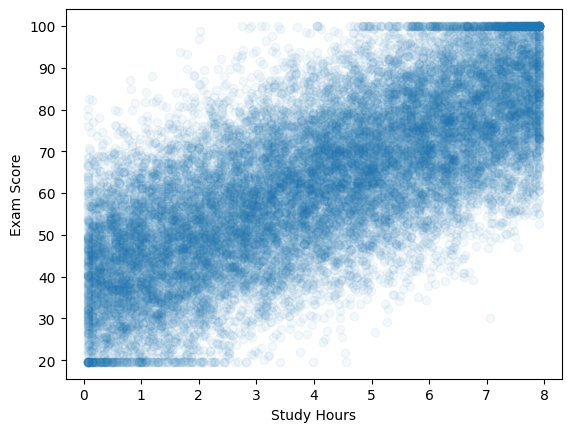

In [39]:
import matplotlib.pyplot as plt

plt.scatter(dataframe["study_hours"],dataframe["exam_score"],alpha=0.05)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [40]:
#visualization of the ralation between the two datasets 
correlation1=dataframe["sleep_hours"].corr(dataframe["exam_score"])
print(correlation1)
correlation2=dataframe["class_attendance"].corr(dataframe["exam_score"])
print(correlation2)
correlation3=dataframe["study_hours"].corr(dataframe["exam_score"])
print(correlation3)

0.13322174783646304
0.3088502700556466
0.7177879939079731


In [41]:
X = dataframe.drop(columns=["exam_score"])
y = dataframe["exam_score"]


In [42]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE:", rmse)


Validation RMSE: 9.772594037039362
